# NSLP Proxy Data

As advised by Pujol et al., SC state SEA's office.

In [29]:
from dp_policy.titlei.utils import get_inputs, get_sppe, data
from dp_policy.titlei.mechanisms import GroundTruth

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

%matplotlib inline
%load_ext autoreload
%autoreload 2

saipe = get_inputs(2021)
sppe = get_sppe("../data/sppe18.xlsx")
print(saipe.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
(13190, 24)


In [2]:
census = data(saipe, GroundTruth(), sppe)
census

Name  \
State FIPS Code District ID                                        
1               190               Alabaster City School District   
                5               Albertville City School District   
                30           Alexander City City School District   
                60                Andalusia City School District   
                90                 Anniston City School District   
...                                                          ...   
56              4260              Uinta County School District 6   
                6240           Washakie County School District 1   
                5820           Washakie County School District 2   
                4830             Weston County School District 1   
                6090             Weston County School District 7   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
1               190                         451569.585546   
                5                           820486.906460   
                30                          548830.474149   
                60                          255888.455695   
                90                          690724.128654   
...                                                   ...   
56              4260                         40822.247350   
                6240                        223321.706091   
                5820                             0.000000   
                4830                        182499.458741   
                6090                         20411.123675   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
1               190                                  58092.627841   
                5                                   200836.024036   
                30                                  135670.119992   
                60                                   63255.265741   
                90                                  170746.031480   
...                                                           ...   
56              4260                                     0.000000   
                6240                                 24485.720477   
                5820                                  5762.953584   
                4830                                 93609.867864   
                6090                                     0.000000   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
1               190                            182516.637263   
                5                              553590.326339   
                30                             392958.114409   
                60                             157617.381627   
                90                             537272.595916   
...                                                      ...   
56              4260                                0.000000   
                6240                           149352.494295   
                5820                                0.000000   
                4830                           135338.332211   
                6090                            13650.496790   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
1               190                        194698.670798   
                5                          592983.087034   
                30                         419186.018887   
                60                         168137.519722   
                90                         573132.739294   
...                                                  ...   
56              4260                            0.000000   
                6240                       148614.520996   
                5820                            0.

In [3]:
from dp_policy.titlei.utils import split_leaids

nslp = pd.read_csv("../data/nslp19.csv")  
nslp["District ID"], nslp["State FIPS Code"] = split_leaids(nslp["LEAID"].astype(int))
nslp

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,DATA_GROUP,LUNCH_PROGRAM,STUDENT_COUNT,TOTAL_INDICATOR,DMS_FLAG,District ID,State FIPS Code
0,2019-2020,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,1.000050e+10,100870,Direct Certification,Not Applicable,286.0,Education Unit Total,Reported,5,1
1,2019-2020,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,1.000050e+10,100870,Free and Reduced-price Lunch Table,No Category Codes,608.0,Education Unit Total,Reported,5,1
2,2019-2020,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,1.000050e+10,100870,Free and Reduced-price Lunch Table,Reduced-price lunch qualified,55.0,Category Set A,Reported,5,1
3,2019-2020,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,1.000050e+10,100870,Free and Reduced-price Lunch Table,Missing,0.0,Category Set A,Reported,5,1
4,2019-2020,1,ALABAMA,AL,Albertville Middle School,1,NaN,AL-101,100005,AL-101-0010,1.000050e+10,100870,Free and Reduced-price Lunch Table,Free lunch qualified,553.0,Category Set A,Reported,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495850,2019-2020,78,U.S. VIRGIN ISLANDS,VI,BERTHA BOSCHULTE JUNIOR HIGH,1,NaN,VI-001,7800030,VI-001-9,7.800030e+11,7800034,Direct Certification,Not Applicable,NaN,Education Unit Total,Not reported,30,78
495851,2019-2020,78,U.S. VIRGIN ISLANDS,VI,BERTHA BOSCHULTE JUNIOR HIGH,1,NaN,VI-001,7800030,VI-001-9,7.800030e+11,7800034,Free and Reduced-price Lunch Table,No Category Codes,544.0,Education Unit Total,Reported,30,78
495852,2019-2020,78,U.S. VIRGIN ISLANDS,VI,BERTHA BOSCHULTE JUNIOR HIGH,1,NaN,VI-001,7800030,VI-001-9,7.800030e+11,7800034,Free and Reduced-price Lunch Table,Missing,0.0,Category Set A,Reported,30,78
495853,2019-2020,78,U.S. VIRGIN ISLANDS,VI,BERTHA BOSCHULTE JUNIOR HIGH,1,NaN,VI-001,7800030,VI-001-9,7.800030e+11,7800034,Free and Reduced-price Lunch Table,Reduced-price lunch qualified,0.0,Category Set A,Reported,30,78


In [4]:
nslp_wide = nslp.pivot(index=["State FIPS Code", "District ID", "SCHID"], columns='LUNCH_PROGRAM', values='STUDENT_COUNT')
print(nslp.shape, nslp[["State FIPS Code", "District ID", "SCHID", "LUNCH_PROGRAM"]].drop_duplicates().shape)
nslp_wide["nslp_total"] = nslp_wide.sum(axis=1) - nslp_wide["Not Applicable"]
nslp_wide

(495855, 19) (495855, 4)


LUNCH_PROGRAM                        Free lunch qualified  Missing  \
State FIPS Code District ID SCHID                                    
1               5           100870                  553.0      0.0   
                            100871                  829.0      0.0   
                            100879                  611.0      0.0   
                            100889                  663.0      0.0   
                            101616                  364.0      0.0   
...                                                   ...      ...   
78              30          7800024                 369.0      0.0   
                            7800026                 454.0      0.0   
                            7800027                 377.0      0.0   
                            7800033                 767.0      0.0   
                            7800034                 544.0      0.0   

LUNCH_PROGRAM                        No Category Codes  Not Applicable  \
State FIPS Code District ID SCHID                                        
1               5           100870               608.0           286.0   
                            100871               901.0           425.0   
                            100879               649.0           327.0   
                            100889               706.0           368.0   
                            101616               384.0           254.0   
...                                                ...             ...   
78              30          7800024              369.0             NaN   
                            7800026              454.0             NaN   
                            7800027              377.0             NaN   
                            7800033              767.0             NaN   
                            7800034              544.0             NaN   

LUNCH_PROGRAM                        Reduced-price lunch qualified  nslp_total  
State FIPS Code District ID SCHID                                               
1               5           100870                            55.0      1216.0  
                            100871                            72.0      1802.0  
                            100879                            38.0      1298.0  
                            100889                            43.0      1412.0  
                            101616                            20.0       768.0  
...                                                            ...         ...  
78              30          7800024                            0.0         NaN  
                            7800026                            0.0         NaN  
                            7800027                            0.0         NaN  
                            7800033                            0.0         NaN  
                            7800034                            0.0         NaN  

[99171 rows x 6 columns]

In [26]:
nslp_district = nslp_wide.groupby(["State FIPS Code", "District ID"]).sum()
nslp_district = nslp_district[nslp_district['nslp_total'] > 0]
nslp_district

LUNCH_PROGRAM                Free lunch qualified  Missing  No Category Codes  \
State FIPS Code District ID                                                     
1               5                          3777.0      0.0             4039.0   
                6                          3478.0      0.0             3910.0   
                7                          2540.0      0.0             3230.0   
                8                          1552.0      0.0             1951.0   
                11                          808.0      0.0              911.0   
...                                           ...      ...                ...   
56              5762                        522.0      0.0              779.0   
                5830                        309.0      0.0              500.0   
                6090                         61.0      0.0               81.0   
                6240                        365.0      0.0              519.0   
                80254                         0.0      0.0                3.0   

LUNCH_PROGRAM                Not Applicable  Reduced-price lunch qualified  \
State FIPS Code District ID                                                  
1               5                    2053.0                          262.0   
                6                    2132.0                          432.0   
                7                    1384.0                          690.0   
                8                     855.0                          399.0   
                11                    553.0                          103.0   
...                                     ...                            ...   
56              5762                  214.0                          257.0   
                5830                   58.0                          185.0   
                6090                   22.0                           20.0   
                6240                  100.0                          154.0   
                80254                   3.0                            0.0   

LUNCH_PROGRAM                nslp_total  
State FIPS Code District ID              
1               5                8078.0  
                6                7820.0  
                7                6460.0  
                8                3902.0  
                11               1822.0  
...                                 ...  
56              5762             1558.0  
                5830              972.0  
                6090              162.0  
                6240             1038.0  
                80254               3.0  

[7176 rows x 6 columns]

In [27]:
joined = census.join(nslp_district, how="inner")
joined["nslp_prop_eligible"] = 1 - joined["Not Applicable"] / joined["nslp_total"]
joined.loc[:, ['true_children_total', 'true_children_eligible', 'nslp_prop_eligible'] + list(nslp_district.columns)]

true_children_total  true_children_eligible  \
State FIPS Code District ID                                                
1               190                       6710.0                   673.0   
                5                         4131.0                   970.0   
                30                        2575.0                   708.0   
                60                        1465.0                   409.0   
                90                        3065.0                  1103.0   
...                                          ...                     ...   
56              4500                       706.0                    28.0   
                4260                       736.0                    29.0   
                6240                      1295.0                   151.0   
                4830                       816.0                   125.0   
                6090                       249.0                    14.0   

                             nslp_prop_eligible  Free lunch qualified  \
State FIPS Code District ID                                             
1               190                    0.807166                2025.0   
                5                      0.745853                3777.0   
                30                     0.650318                1792.0   
                60                     0.650905                 873.0   
                90                     0.573431                1430.0   
...                                         ...                   ...   
56              4500                   0.829114                 103.0   
                4260                   0.832237                 109.0   
                6240                   0.903661                 365.0   
                4830                   0.838785                 157.0   
                6090                   0.864198                  61.0   

                             Missing  No Category Codes  Not Applicable  \
State FIPS Code District ID                                               
1               190              0.0             2484.0           958.0   
                5                0.0             4039.0          2053.0   
                30               0.0             1886.0          1319.0   
                60               0.0              994.0           694.0   
                90               0.0             1498.0          1278.0   
...                              ...                ...             ...   
56              4500             0.0              158.0            54.0   
                4260             0.0              152.0            51.0   
                6240             0.0              519.0           100.0   
                4830             0.0              214.0            69.0   
                6090             0.0               81.0            22.0   

                             Reduced-price lunch qualified  nslp_total  
State FIPS Code District ID                                             
1               190                                  459.0      4968.0  
                5                                    262.0      8078.0  
                30                                    94.0      3772.0  
                60                                   121.0      1988.0  
                90                                    68.0      2996.0  
...                                                    ...         ...  
56              4500                                  55.0       316.0  
                4260                                  43.0       304.0  
                6240                                 154.0      1038.0  
                4830                                  57.0       428.0  
                6090                                  20.0       162.0  

[5423 rows x 9 columns]

(0.9589782537694345, 0.0)

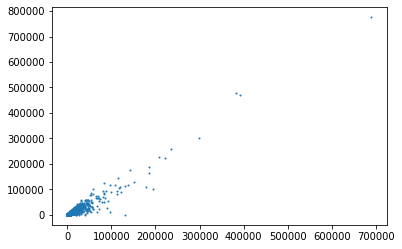

In [28]:
plt.scatter(joined.true_children_total, joined["nslp_total"], s=1)
stats.pearsonr(joined.true_children_total, joined["nslp_total"])

(0.9626990176386088, 0.0)

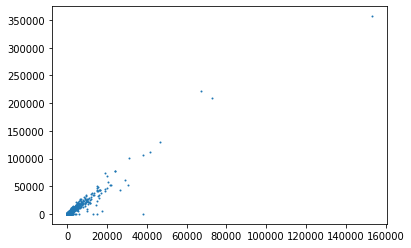

In [18]:
plt.scatter(joined.true_children_eligible, joined["Free lunch qualified"], s=1)
stats.pearsonr(joined.true_children_eligible, joined["Free lunch qualified"])

count      5423.000000
mean        826.053107
std        3313.790767
min           0.000000
25%          58.000000
50%         195.000000
75%         641.500000
max      152946.000000
Name: true_children_eligible, dtype: float64


5547.744436976598

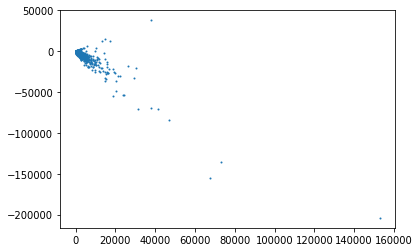

In [31]:
plt.scatter(joined.true_children_eligible, joined.true_children_eligible - joined["Free lunch qualified"], s=1)
print(joined.true_children_eligible.describe())
np.sqrt(np.mean(np.power(joined.true_children_eligible - joined["Free lunch qualified"], 2)))

(-0.025672258054785797, 0.05870354449683837)

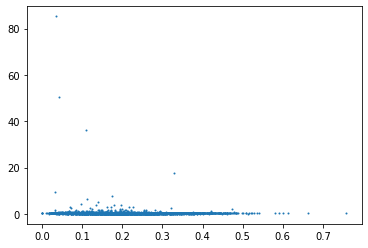

In [19]:
plt.scatter(
  joined.true_children_eligible / joined.true_children_total,
  joined["Free lunch qualified"] / joined["nslp_total"],
  s=1
)
stats.pearsonr(joined.true_children_eligible / joined.true_children_total, joined["Free lunch qualified"] / joined["nslp_total"])